Coursework  - Task 4

In [27]:
# Importing Libarys
import torch
import torchvision
import torchvision.transforms as transforms

In [28]:
# Transransforming PILImage to Tensors.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Implement Neural Network

Implementing Convolutional Neural Network (Propose Improvements)

In [29]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

# We used this function to make it Convolutional as we are focused on visual imagry.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flattens all dimensions apart from batch
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


network = Network()

In [30]:
# Defining the Loss function and the optimiser
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)

In [31]:

# Loops over the dataset multiple times
for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # Gets the inputs and defines data is a list of [inputs, labels]
        inputs, labels = data

        # Zeros the parameter gradients
        optimizer.zero_grad()

        # Network goes forwards, backwards and optimises
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Prints the  Statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    
            
            # Prints every data batch
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Done')


[1,  2000] loss: 2.187
[1,  4000] loss: 1.943
[1,  6000] loss: 1.711
[1,  8000] loss: 1.602
[1, 10000] loss: 1.521
[1, 12000] loss: 1.489
[2,  2000] loss: 1.417
[2,  4000] loss: 1.379
[2,  6000] loss: 1.331
[2,  8000] loss: 1.324
[2, 10000] loss: 1.330
[2, 12000] loss: 1.289
Done


In [34]:
# Saved trained  model
PATH = './cifar_net.pth'
torch.save(network.state_dict(), PATH)

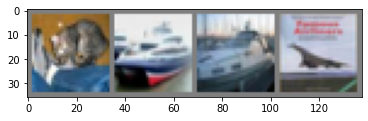

Type:    cat  ship  ship plane


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Test network with test data
dataiter = iter(testloader)
images, labels = dataiter.next()

def imshow(img):
    
    # Unnormalises Images
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Print images
imshow(torchvision.utils.make_grid(images))
print('Type: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
# Neural Networks Attempt to guess images on test data
outputs = network(images)

_, prediction = torch.max(outputs, 1)

print('Prediction: ', ' '.join('%5s' % classes[prediction[j]]
                              for j in range(4)))

Prediction:    cat  ship   car  ship


In [37]:
# Neural Networks Attempt to guess images on whole Data Set
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # Calculates outputs by running images through the network
        outputs = network(images)
        
        # We choose the class with the highest energy as a prediction
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()

print('Network Accuracy is: %d %%' % (
    100 * correct / total))

The accuracy of the network is: 54 %
